In [2]:
import pandas as pd 
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
diabetes_df = pd.read_csv("../week_06/diabetes.csv")

diabetes_df.head()

C:\Users\toriw\AppData\Local\Temp\ipykernel_43968\3075278700.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome',axis =1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, random_state=32)
#standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [4]:
from  sklearn.ensemble import RandomForestClassifier
# Random forest is aggregated decision trees
rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7705627705627706

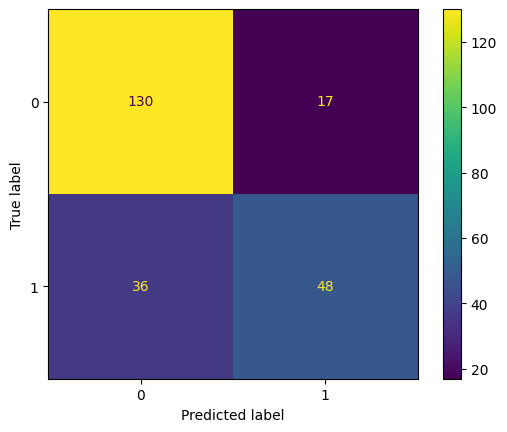

In [5]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [6]:
print(rf.feature_importances_, X.columns)

[0.07752845 0.25176108 0.09074299 0.07486229 0.06483672 0.15702008
 0.12894129 0.15430709] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


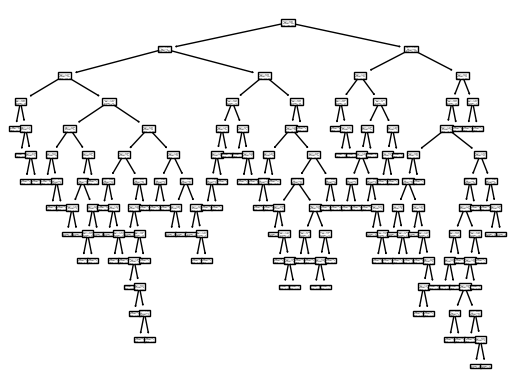

In [9]:
import matplotlib.pyplot as plt
tree_5 = rf.estimators_[4]
tree.plot_tree (tree_5 )
plt.savefig("tree_5.png")

In [10]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

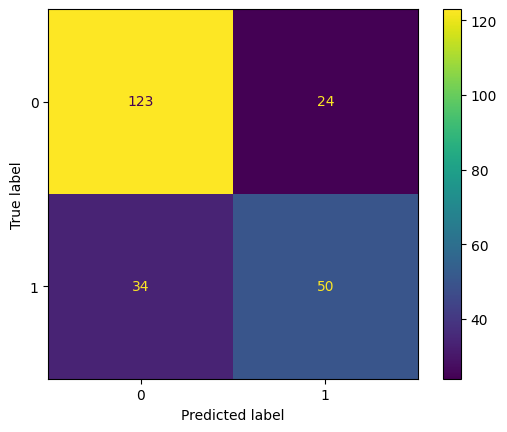

In [11]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
# ROC = reciving, operating characteristics curve
# ROC curves summarize the trade-off between true positives
# And false positives. They are the most appropriate for
# Balanced datasets. Can be overly optimistic for 
# severely imbalanced classification problems.

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
# higher AUC shows a better model typically
auc

0.7159863945578232

Text(0, 0.5, 'True Postive Rate')

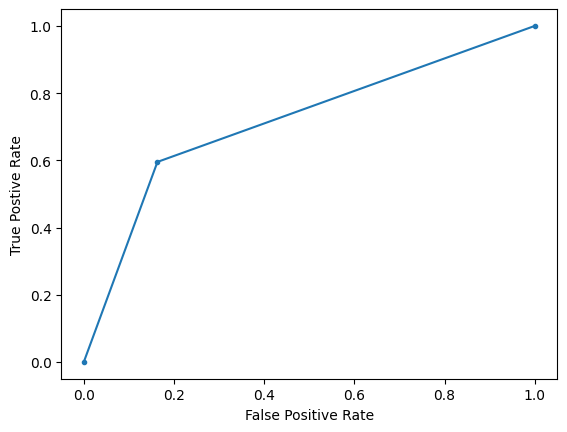

In [16]:
plt.plot(fpr, tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")

In [17]:
# precision-recall curve summarized the tradeoff between true positive 
#rates and positive valies. These are ideal for imbalanced datasets (where one out come is 10x more likely than the other)

from sklearn.metrics import precision_recall_curve, f1_score, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

pr_auc = auc(recall, precision)
pr_auc

0.709049959049959

Text(0, 0.5, 'precision')

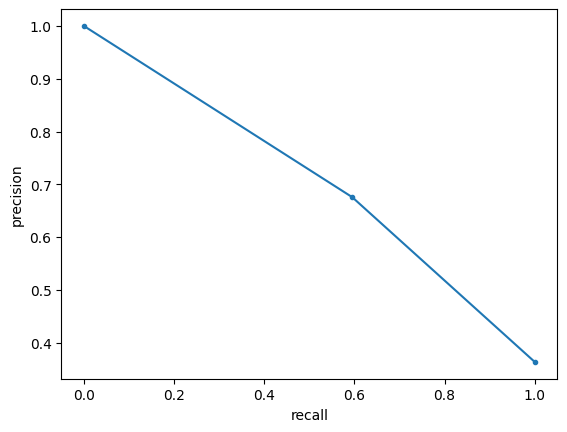

In [18]:
plt.plot(recall, precision, marker = ".")
plt.xlabel('recall')
plt.ylabel('precision')

In [19]:
# f1 score = 2*precision*recall/(precision+recall)
# It combines precision and recall socres to compute
# how many time the model made a correct prediction across the whole dataset
f1 = f1_score(y_test, y_pred)
f1

0.6329113924050633